Pada notebook ini akan dibahas percobaan klasifikasi yang saya lakukan pada dataset mengenai persebaran harga handphone berdasarkan fitur yang menyertainya. Dataset yang digunakan diperoleh dari https://www.kaggle.com/iabhishekofficial/mobile-price-classification.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\WPy-3670\python-3.6.7.amd64\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [23]:
train=pd.read_csv('train.csv')

In [24]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

Kolom pada dataset ini berisi :
 - battery_power : total tenaga baterai yang dapat disimpan dalam mAh
 - blue          : memiliki bluetooth atau tidak
 - clock_speed   : waktu yang dibutuhkan untuk microprocessor mengeksekusi instruksi
 - dual_sim      : support dual_sim atau tidak
 - fc            : mega pixel kamera depan
 - four_g        : memiliki 4G atau tidak
 - int_memory    : memori internal dalam gigabyte
 - m_dep         : ketebalan handphone dalam cm
 - mobile_wt     : berat handphone
 - n_cores       : jumlah core processor
 - pc            : mega pixel kamera utama
 - px_height     : resolusi tinggi pixel
 - px_width      : resolusi lebar pixel
 - ram           : Kapasitas RAM dalam megabyte
 - sc_h          : panjang layar dalam cm
 - sc_w          : lebar layar dalam cm
 - talk_time     : lama waktu penggunaan handphone
 - three_g       : memiliki 3G atau tidak
 - touch_screen  : memiliki layar sentuh atau tidak
 - wifi          : memiliki wifi atau tidak
 - price_range   : persebaran harga 0 (low cost); 1 (medium cost); 2(high cost); 3(very high cost)

In [5]:
train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Dari deskripsi ingkat variabel diatas kita dapat mengambil beberapa kesimpulan :
- Tidak adanya missing value pada data tersebut
- Variabelnya terbagi menjadi numerik dan kategorik, namun variabel kategorik yang ada telah direpresentasikan dalam bentuk numerik.
- Pada variabel px_height dan fc jarak nilai maksimum dengan nilai kuartil ke 3 cukup jauh melebihi 2 kali lipat jarak antar kuartil lain. Ini mengindikasikan kemungkinan adanya outlier pada data ini.

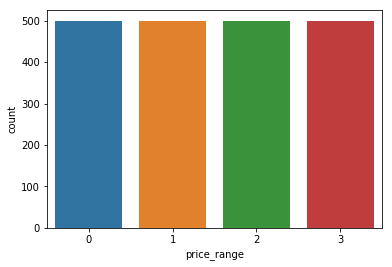

In [6]:
sns.countplot(train.price_range)

Selanjutnya melalui plot persebaran jumlah kategori pada variabel target (price_range) diatas kita bisa menyimpulkan data yang ada telah balance jadi tidak diperlukan sampling ulang.

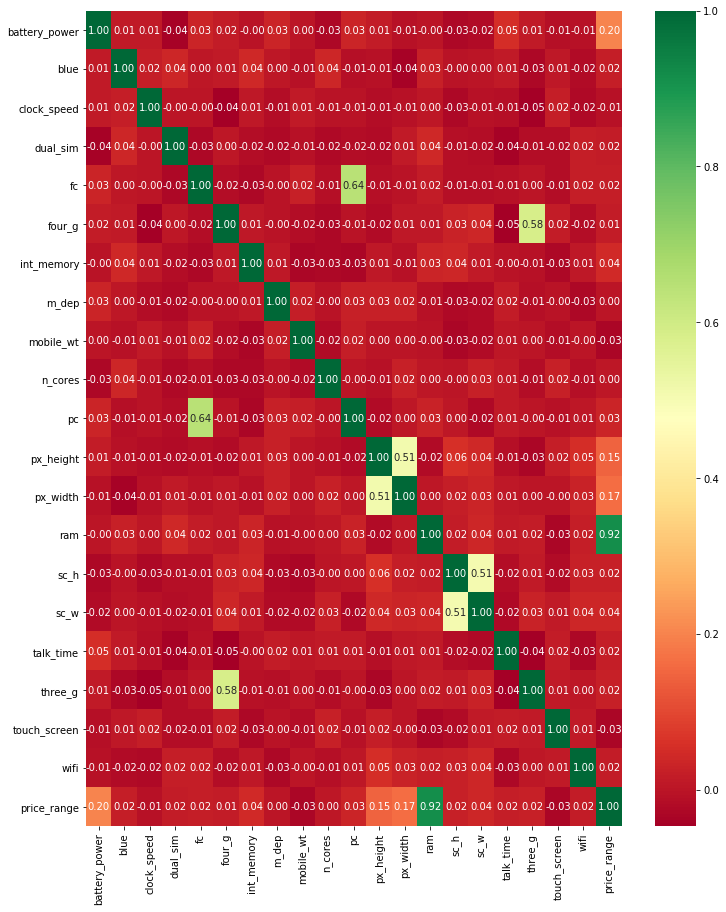

In [7]:
plt.figure(figsize=(12,15))
sns.heatmap(train.corr(),annot=True,fmt='.2f',cmap ='RdYlGn')

Melalui heatmap korelasi tersebut tidak ditemukan adanya indikasi multi kolinearitas pada tiap variabel.

Sebelumnya kita telah melihat melalui deskripsi singkat pada data terdapat adanya indikasi outlier untuk mendeteksi outlier pada data multivariat ini kita akan gunakan jarak mahalanobis. Jarak mahanalobis dirumuskan sebagai berikut :

<img src="1_O51giyF0VmVXHKmprf0bGg.png">

Dengan :
- $x_n$ : melambangkan nilai observasi
- $\mu$ : melambangkan nilai mean dari tiap variabel independent (kolom)
- $C^{-1}$ : melambangkan inverse matrix covariance

Jarak mahalanobis menggunakan cut-off sebagai perbandingannya. Jika mengasumsikan distribusi multivariat normal dengan jumlah variabel K maka jarak mahalanobis mengikuti distribusi chi-square dengan derajat kebebasan berjumlah K. Dirumuskan dengan :

<img src="1_JsMhL1DHVS5cJ7jU8c3KJg.png">

In [29]:
from scipy.stats import chi2
def mahalanobis(df):
    x_minus_mu = df - np.mean(df)
    cov = np.cov(df.values.T)                           
    inv_covmat = np.linalg.inv(cov)                     
    left_term = np.dot(x_minus_mu, inv_covmat) 
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    C = np.sqrt(chi2.ppf((1-0.01), df=df.shape[1]))    #taraf signifikansi 1%
    outlier=[]
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
    return outlier,md

In [30]:
outlier_index,m_dist=mahalanobis(train)

In [42]:
print(outlier_index)

[140, 158, 219, 300, 322, 351, 387, 401, 584, 770, 801, 805, 900, 1016, 1045, 1397, 1472, 1615, 1686, 1807, 1827]


Ternyata terdapat beberapa outlier yang terdeteksi menggunakan jarak mahalanobis. Kemudian kita drop outlier tersebut.

In [31]:
train.drop(index=outlier_index,inplace=True)

Selanjutnya untuk tahap pembentukan dan pemilihan model klasifikasi dilakukan dengan GridSearchCV yang melakukan fit-in model pada seluruh kombinasi parameter yang diberikan. Model yang dijadikan percobaan untuk notebook ini adalah random forest, svm dan knn.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold

In [37]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=['price_range']), train['price_range'], test_size=0.2, random_state=42)

In [34]:
metric = 'accuracy'
params = {}
params['criterion'] = ['entropy','gini']
params['max_depth'] = [100,500,1000,None]
params['n_estimators']=[100,500,1000,None]
gridRF= GridSearchCV(RandomForestClassifier(), params, cv=StratifiedKFold(), scoring=metric, verbose=1, n_jobs=-1) 
gridRF.fit(X_train, y_train)
print(gridRF.best_score_)
print(gridRF.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.4min finished


0.8850277522661022
{'criterion': 'entropy', 'max_depth': 100, 'n_estimators': 1000}


In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
metric = 'accuracy'
params = {}
params['n_neighbors'] = [3, 5, 10]
params['weights'] = ('distance', 'uniform')
params['algorithm']=('auto', 'ball_tree', 'kd_tree', 'brute')
gridKNN = GridSearchCV(KNeighborsClassifier(), params, cv=StratifiedKFold(), scoring=metric, verbose=1, n_jobs=-1) 
gridKNN.fit(X_train, y_train)
print(gridKNN.best_score_)
print(gridKNN.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    3.1s


0.9248292936149823
{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.7s finished


In [27]:
from sklearn.svm import SVC

In [28]:
metric = 'accuracy'
params = {}
params['C'] = [0.1, 10, 100] 
params['kernel'] = ['rbf', 'poly', 'sigmoid', 'linear']
params['decision_function_shape'] = ['ovo', 'ovr']
gridSVM = GridSearchCV(SVC(), params, cv=StratifiedKFold(), scoring=metric, verbose=1, n_jobs=-1) 
gridSVM.fit(X_train, y_train)
print(gridSVM.best_score_)
print(gridSVM.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.6min finished


0.97625
{'C': 100, 'decision_function_shape': 'ovo', 'kernel': 'linear'}


Dari ketiga model tersebut sekilas kita melihat bahwa model SVM merupakan model terbaik karena memiliki skor model paling besar.

Accuracy Random Forest: 0.88 (+/- 0.01)
Accuracy KNN: 0.92 (+/- 0.01)
Accuracy SVM: 0.79 (+/- 0.59)


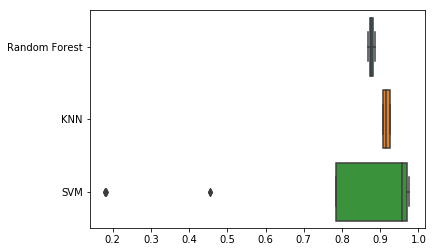

In [46]:
RF_score = gridRF.cv_results_['mean_test_score'][:20]
KNN_score = gridKNN.cv_results_['mean_test_score'][:20]
SVM_score = gridSVM.cv_results_['mean_test_score'][:20]
models = ['Random Forest','KNN','SVM']
scores = [RF_score,KNN_score, SVM_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

sns.boxplot(data=pd.DataFrame(data), orient='h')
plt.show()

Dari grafik persebaran test skor yang ada terlihar bahwa model SVM memiliki standar deviasi yang cukup besar ini berarti model SVM memiliki resiko yang besar dibandingkan model lainnya yang memiliki standar devias kecil sehingga untuk pemilihan model ini kita pilih model KNN

Langkah terakhir kita evaluasi model yang diperoleh.

In [47]:
from sklearn.metrics import confusion_matrix,classification_report

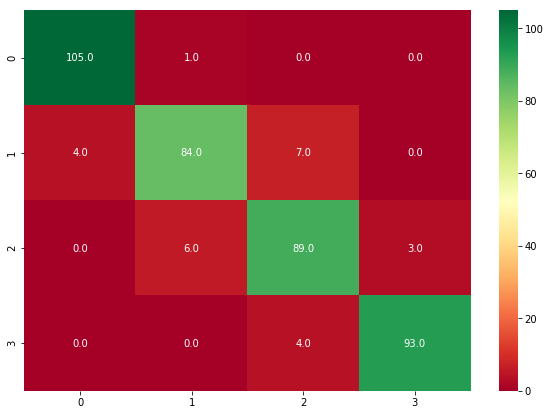

In [62]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,gridKNN.predict(X_test)),annot=True,cmap ='RdYlGn',fmt='.1f')

In [63]:
print(classification_report(y_test,gridKNN.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       106
           1       0.92      0.88      0.90        95
           2       0.89      0.91      0.90        98
           3       0.97      0.96      0.96        97

    accuracy                           0.94       396
   macro avg       0.94      0.94      0.94       396
weighted avg       0.94      0.94      0.94       396



Dari hasil evaluasi tersebut kita dapat simpulkan bahwa model terpilih memiliki performa yang cukup baik dalam mengklasifikasi harga handphone berdasarkan fiturnya.

Sumber :
- https://www.kaggle.com/iabhishekofficial/mobile-price-classification
- https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-2-3a3319ec2c33
- https://www.machinelearningplus.com/statistics/mahalanobis-distance/
- https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/
- https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74